In [373]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow. keras.models import Sequential,Model,save_model,load_model
import pickle
import os

In [374]:
'''case_name ='case118'
data_size = 800;
address = 'train_data/' + case_name+'/'+str(data_size)+'/'
P = pd.read_csv(address +'P.csv', header = None)
Q = pd.read_csv(address+'Q.csv', header = None)
V = pd.read_csv( address+'V.csv', header = None)
Va = pd.read_csv(address+'Va.csv', header = None)
I= pd.read_csv(address+'I.csv', header = None)
Ia = pd.read_csv(address+'Ia.csv', header = None)
num_train = P.shape[0]
num_bus = P.shape[1]

 
#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

P=scaler.fit_transform(P)
P= pd.DataFrame(P)
Q=scaler.fit_transform(Q)
Q= pd.DataFrame(Q)
V=scaler.fit_transform(V)
V= pd.DataFrame(V)
Va=scaler.fit_transform(Va)
Va= pd.DataFrame(Va)
I=scaler.fit_transform(I)
I= pd.DataFrame(I)
Ia=scaler.fit_transform(Ia)
Ia= pd.DataFrame(Ia)
#Saving Scaled Data
P.to_csv(address+'Scaled/P.csv', header = None,index=False)
Q.to_csv(address+'Scaled/Q.csv', header = None,index=False)
V.to_csv(address+'Scaled/V.csv', header = None,index =False)
Va.to_csv(address+'Scaled/Va.csv', header = None,index=False)
I.to_csv(address+'Scaled/I.csv', header = None,index=False)
Ia.to_csv(address+'Scaled/Ia.csv', header = None,index=False)'''

"case_name ='case118'\ndata_size = 800;\naddress = 'train_data/' + case_name+'/'+str(data_size)+'/'\nP = pd.read_csv(address +'P.csv', header = None)\nQ = pd.read_csv(address+'Q.csv', header = None)\nV = pd.read_csv( address+'V.csv', header = None)\nVa = pd.read_csv(address+'Va.csv', header = None)\nI= pd.read_csv(address+'I.csv', header = None)\nIa = pd.read_csv(address+'Ia.csv', header = None)\nnum_train = P.shape[0]\nnum_bus = P.shape[1]\n\n \n#Scaling \nfrom sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\n\nP=scaler.fit_transform(P)\nP= pd.DataFrame(P)\nQ=scaler.fit_transform(Q)\nQ= pd.DataFrame(Q)\nV=scaler.fit_transform(V)\nV= pd.DataFrame(V)\nVa=scaler.fit_transform(Va)\nVa= pd.DataFrame(Va)\nI=scaler.fit_transform(I)\nI= pd.DataFrame(I)\nIa=scaler.fit_transform(Ia)\nIa= pd.DataFrame(Ia)\n#Saving Scaled Data\nP.to_csv(address+'Scaled/P.csv', header = None,index=False)\nQ.to_csv(address+'Scaled/Q.csv', header = None,index=False)\nV.to_csv(address+'Scaled/V.csv',

In [375]:
case_name ='case14'
data_size = 500;
address = 'train_data/' + case_name+'/'+str(data_size)+'/Scaled/'
P = pd.read_csv(address +'P.csv', header = None)
Q = pd.read_csv(address+'Q.csv', header = None)
V = pd.read_csv( address+'V.csv', header = None)
Va = pd.read_csv(address+'Va.csv', header = None)
I= pd.read_csv(address+'I.csv', header = None)
Ia = pd.read_csv(address+'Ia.csv', header = None)
num_train = P.shape[0]
num_bus = P.shape[1]

In [376]:
X = pd.concat([P,Q,I,Ia],axis=1)
Y1 = pd.concat([V],axis=1)

In [377]:
Y1.shape

(500, 14)

In [378]:
X = pd.concat([P,Q,I,Ia],axis=1)
Y2 = pd.concat([Va],axis=1)

In [379]:
    

    from keras.models import Sequential # Used to build model
    from keras.layers import Dense # Type of layer
    from keras.optimizers import Adam # Optimization technique
    from keras.layers import Dropout # For tuning the neural network
    from keras import regularizers # For regularization
    mape = tf.keras.losses.MeanAbsoluteError()
    m = tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)

    #initializing neural network
    model1 = Sequential()
    model1.add(Dense(units =2*num_bus, input_dim=num_bus*4, activation='relu'))
    model1.add(Dense(units=2*num_bus ,activation='relu'))
    model1.add(Dense(units=2*num_bus ,activation='relu'))
    model1.add(Dense(units=num_bus, activation='linear'))
    
    model1.compile(loss=mape,optimizer ='adam',metrics=[m])
  


In [380]:
X.shape

(500, 56)

In [381]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_error",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="min",
    restore_best_weights=True,
)

In [382]:
 # model1.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=1000,batch_size=32) 

In [383]:
  history1=model1.fit(X,Y1,validation_data =(X,Y1),epochs=500,batch_size=32,callbacks=[callback]) 

Train on 500 samples, validate on 500 samples
Epoch 1/500
500/500 [==============================] - 0s 850us/step - loss: 0.4916 - mean_absolute_error: 0.5263 - val_loss: 0.3980 - val_mean_absolute_error: 0.4610
Epoch 2/500
500/500 [==============================] - 0s 74us/step - loss: 0.3429 - mean_absolute_error: 0.4282 - val_loss: 0.2881 - val_mean_absolute_error: 0.3927
Epoch 3/500
500/500 [==============================] - 0s 80us/step - loss: 0.2513 - mean_absolute_error: 0.3664 - val_loss: 0.2165 - val_mean_absolute_error: 0.3412
Epoch 4/500
500/500 [==============================] - 0s 82us/step - loss: 0.1962 - mean_absolute_error: 0.3209 - val_loss: 0.1819 - val_mean_absolute_error: 0.3029
Epoch 5/500
500/500 [==============================] - 0s 78us/step - loss: 0.1802 - mean_absolute_error: 0.2887 - val_loss: 0.1766 - val_mean_absolute_error: 0.2770
Epoch 6/500
500/500 [==============================] - 0s 80us/step - loss: 0.1748 - mean_absolute_error: 0.2674 - val_loss

Epoch 50/500
500/500 [==============================] - 0s 86us/step - loss: 0.1084 - mean_absolute_error: 0.1477 - val_loss: 0.1072 - val_mean_absolute_error: 0.1473
Epoch 51/500
500/500 [==============================] - 0s 82us/step - loss: 0.1073 - mean_absolute_error: 0.1469 - val_loss: 0.1070 - val_mean_absolute_error: 0.1465
Epoch 52/500
500/500 [==============================] - 0s 90us/step - loss: 0.1073 - mean_absolute_error: 0.1462 - val_loss: 0.1066 - val_mean_absolute_error: 0.1458
Epoch 53/500
500/500 [==============================] - 0s 86us/step - loss: 0.1073 - mean_absolute_error: 0.1454 - val_loss: 0.1057 - val_mean_absolute_error: 0.1450
Epoch 54/500
500/500 [==============================] - 0s 90us/step - loss: 0.1063 - mean_absolute_error: 0.1447 - val_loss: 0.1051 - val_mean_absolute_error: 0.1443
Epoch 55/500
500/500 [==============================] - 0s 80us/step - loss: 0.1057 - mean_absolute_error: 0.1440 - val_loss: 0.1076 - val_mean_absolute_error: 0.143

500/500 [==============================] - 0s 82us/step - loss: 0.0773 - mean_absolute_error: 0.1201 - val_loss: 0.0754 - val_mean_absolute_error: 0.1198
Epoch 100/500
500/500 [==============================] - 0s 72us/step - loss: 0.0772 - mean_absolute_error: 0.1196 - val_loss: 0.0756 - val_mean_absolute_error: 0.1194
Epoch 101/500
500/500 [==============================] - 0s 78us/step - loss: 0.0766 - mean_absolute_error: 0.1192 - val_loss: 0.0753 - val_mean_absolute_error: 0.1190
Epoch 102/500
500/500 [==============================] - 0s 76us/step - loss: 0.0764 - mean_absolute_error: 0.1187 - val_loss: 0.0765 - val_mean_absolute_error: 0.1185
Epoch 103/500
500/500 [==============================] - 0s 74us/step - loss: 0.0768 - mean_absolute_error: 0.1183 - val_loss: 0.0763 - val_mean_absolute_error: 0.1181
Epoch 104/500
500/500 [==============================] - 0s 82us/step - loss: 0.0758 - mean_absolute_error: 0.1179 - val_loss: 0.0738 - val_mean_absolute_error: 0.1177
Epoch 

Epoch 148/500
500/500 [==============================] - 0s 74us/step - loss: 0.0632 - mean_absolute_error: 0.1033 - val_loss: 0.0635 - val_mean_absolute_error: 0.1032
Epoch 149/500
500/500 [==============================] - 0s 70us/step - loss: 0.0628 - mean_absolute_error: 0.1031 - val_loss: 0.0617 - val_mean_absolute_error: 0.1029
Epoch 150/500
500/500 [==============================] - 0s 80us/step - loss: 0.0633 - mean_absolute_error: 0.1028 - val_loss: 0.0630 - val_mean_absolute_error: 0.1027
Epoch 151/500
500/500 [==============================] - 0s 74us/step - loss: 0.0634 - mean_absolute_error: 0.1025 - val_loss: 0.0613 - val_mean_absolute_error: 0.1024
Epoch 152/500
500/500 [==============================] - 0s 82us/step - loss: 0.0628 - mean_absolute_error: 0.1023 - val_loss: 0.0620 - val_mean_absolute_error: 0.1021
Epoch 153/500
500/500 [==============================] - 0s 74us/step - loss: 0.0640 - mean_absolute_error: 0.1020 - val_loss: 0.0612 - val_mean_absolute_error:

Epoch 197/500
500/500 [==============================] - 0s 86us/step - loss: 0.0565 - mean_absolute_error: 0.0924 - val_loss: 0.0575 - val_mean_absolute_error: 0.0923
Epoch 198/500
500/500 [==============================] - 0s 80us/step - loss: 0.0573 - mean_absolute_error: 0.0922 - val_loss: 0.0538 - val_mean_absolute_error: 0.0921
Epoch 199/500
500/500 [==============================] - 0s 82us/step - loss: 0.0556 - mean_absolute_error: 0.0920 - val_loss: 0.0534 - val_mean_absolute_error: 0.0919
Epoch 200/500
500/500 [==============================] - 0s 76us/step - loss: 0.0553 - mean_absolute_error: 0.0918 - val_loss: 0.0537 - val_mean_absolute_error: 0.0917
Epoch 201/500
500/500 [==============================] - 0s 74us/step - loss: 0.0547 - mean_absolute_error: 0.0916 - val_loss: 0.0567 - val_mean_absolute_error: 0.0915
Epoch 202/500
500/500 [==============================] - 0s 80us/step - loss: 0.0556 - mean_absolute_error: 0.0914 - val_loss: 0.0563 - val_mean_absolute_error:

Epoch 246/500
500/500 [==============================] - 0s 82us/step - loss: 0.0488 - mean_absolute_error: 0.0845 - val_loss: 0.0473 - val_mean_absolute_error: 0.0844
Epoch 247/500
500/500 [==============================] - 0s 74us/step - loss: 0.0490 - mean_absolute_error: 0.0843 - val_loss: 0.0478 - val_mean_absolute_error: 0.0843
Epoch 248/500
500/500 [==============================] - 0s 74us/step - loss: 0.0498 - mean_absolute_error: 0.0842 - val_loss: 0.0527 - val_mean_absolute_error: 0.0841
Epoch 249/500
500/500 [==============================] - 0s 78us/step - loss: 0.0497 - mean_absolute_error: 0.0841 - val_loss: 0.0501 - val_mean_absolute_error: 0.0840
Epoch 250/500
500/500 [==============================] - 0s 78us/step - loss: 0.0491 - mean_absolute_error: 0.0839 - val_loss: 0.0500 - val_mean_absolute_error: 0.0839
Epoch 251/500
500/500 [==============================] - 0s 70us/step - loss: 0.0499 - mean_absolute_error: 0.0838 - val_loss: 0.0495 - val_mean_absolute_error:

Epoch 295/500
500/500 [==============================] - 0s 70us/step - loss: 0.0448 - mean_absolute_error: 0.0782 - val_loss: 0.0437 - val_mean_absolute_error: 0.0782
Epoch 296/500
500/500 [==============================] - 0s 78us/step - loss: 0.0444 - mean_absolute_error: 0.0781 - val_loss: 0.0437 - val_mean_absolute_error: 0.0781
Epoch 297/500
500/500 [==============================] - 0s 102us/step - loss: 0.0455 - mean_absolute_error: 0.0780 - val_loss: 0.0430 - val_mean_absolute_error: 0.0780
Epoch 298/500
500/500 [==============================] - 0s 124us/step - loss: 0.0447 - mean_absolute_error: 0.0779 - val_loss: 0.0424 - val_mean_absolute_error: 0.0778
Epoch 299/500
500/500 [==============================] - 0s 112us/step - loss: 0.0436 - mean_absolute_error: 0.0778 - val_loss: 0.0425 - val_mean_absolute_error: 0.0777
Epoch 300/500
500/500 [==============================] - 0s 94us/step - loss: 0.0438 - mean_absolute_error: 0.0777 - val_loss: 0.0439 - val_mean_absolute_err

500/500 [==============================] - 0s 86us/step - loss: 0.0450 - mean_absolute_error: 0.0733 - val_loss: 0.0413 - val_mean_absolute_error: 0.0732
Epoch 344/500
500/500 [==============================] - 0s 96us/step - loss: 0.0418 - mean_absolute_error: 0.0732 - val_loss: 0.0401 - val_mean_absolute_error: 0.0731
Epoch 345/500
500/500 [==============================] - 0s 90us/step - loss: 0.0411 - mean_absolute_error: 0.0731 - val_loss: 0.0436 - val_mean_absolute_error: 0.0731
Epoch 346/500
500/500 [==============================] - 0s 82us/step - loss: 0.0414 - mean_absolute_error: 0.0730 - val_loss: 0.0417 - val_mean_absolute_error: 0.0730
Epoch 347/500
500/500 [==============================] - 0s 80us/step - loss: 0.0416 - mean_absolute_error: 0.0729 - val_loss: 0.0392 - val_mean_absolute_error: 0.0729
Epoch 348/500
500/500 [==============================] - 0s 74us/step - loss: 0.0413 - mean_absolute_error: 0.0728 - val_loss: 0.0401 - val_mean_absolute_error: 0.0728
Epoch 

Epoch 392/500
500/500 [==============================] - 0s 68us/step - loss: 0.0390 - mean_absolute_error: 0.0691 - val_loss: 0.0415 - val_mean_absolute_error: 0.0691
Epoch 393/500
500/500 [==============================] - 0s 76us/step - loss: 0.0395 - mean_absolute_error: 0.0691 - val_loss: 0.0369 - val_mean_absolute_error: 0.0690
Epoch 394/500
500/500 [==============================] - 0s 72us/step - loss: 0.0383 - mean_absolute_error: 0.0690 - val_loss: 0.0366 - val_mean_absolute_error: 0.0689
Epoch 395/500
500/500 [==============================] - 0s 72us/step - loss: 0.0382 - mean_absolute_error: 0.0689 - val_loss: 0.0368 - val_mean_absolute_error: 0.0689
Epoch 396/500
500/500 [==============================] - 0s 80us/step - loss: 0.0378 - mean_absolute_error: 0.0688 - val_loss: 0.0418 - val_mean_absolute_error: 0.0688
Epoch 397/500
500/500 [==============================] - 0s 80us/step - loss: 0.0394 - mean_absolute_error: 0.0687 - val_loss: 0.0377 - val_mean_absolute_error:

500/500 [==============================] - 0s 72us/step - loss: 0.0368 - mean_absolute_error: 0.0657 - val_loss: 0.0345 - val_mean_absolute_error: 0.0657
Epoch 441/500
500/500 [==============================] - 0s 72us/step - loss: 0.0359 - mean_absolute_error: 0.0656 - val_loss: 0.0354 - val_mean_absolute_error: 0.0656
Epoch 442/500
500/500 [==============================] - 0s 74us/step - loss: 0.0363 - mean_absolute_error: 0.0656 - val_loss: 0.0354 - val_mean_absolute_error: 0.0655
Epoch 443/500
500/500 [==============================] - 0s 72us/step - loss: 0.0354 - mean_absolute_error: 0.0655 - val_loss: 0.0359 - val_mean_absolute_error: 0.0655
Epoch 444/500
500/500 [==============================] - 0s 72us/step - loss: 0.0362 - mean_absolute_error: 0.0654 - val_loss: 0.0354 - val_mean_absolute_error: 0.0654
Epoch 445/500
500/500 [==============================] - 0s 72us/step - loss: 0.0374 - mean_absolute_error: 0.0654 - val_loss: 0.0345 - val_mean_absolute_error: 0.0653
Epoch 

Epoch 489/500
500/500 [==============================] - 0s 82us/step - loss: 0.0338 - mean_absolute_error: 0.0627 - val_loss: 0.0354 - val_mean_absolute_error: 0.0627
Epoch 490/500
500/500 [==============================] - 0s 84us/step - loss: 0.0350 - mean_absolute_error: 0.0627 - val_loss: 0.0345 - val_mean_absolute_error: 0.0626
Epoch 491/500
500/500 [==============================] - 0s 80us/step - loss: 0.0356 - mean_absolute_error: 0.0626 - val_loss: 0.0351 - val_mean_absolute_error: 0.0626
Epoch 492/500
500/500 [==============================] - 0s 104us/step - loss: 0.0346 - mean_absolute_error: 0.0626 - val_loss: 0.0341 - val_mean_absolute_error: 0.0625
Epoch 493/500
500/500 [==============================] - 0s 98us/step - loss: 0.0347 - mean_absolute_error: 0.0625 - val_loss: 0.0357 - val_mean_absolute_error: 0.0625
Epoch 494/500
500/500 [==============================] - 0s 102us/step - loss: 0.0346 - mean_absolute_error: 0.0624 - val_loss: 0.0346 - val_mean_absolute_erro

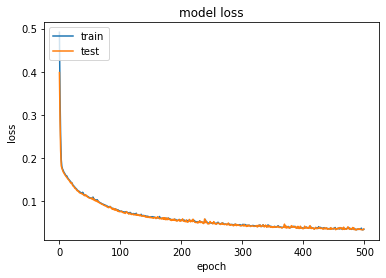

In [384]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [385]:
    model2 = Sequential()
    model2.add(Dense(units =2*num_bus, input_dim=num_bus*4, activation='relu'))
    model2.add(Dense(units=2*num_bus ,activation='relu'))
    model2.add(Dense(units=2*num_bus ,activation='relu'))
    model2.add(Dense(units=num_bus, activation='linear'))
    
    model2.compile(loss=mape,optimizer ='adam',metrics=[m])

In [386]:
#Train_test splitting
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y1, test_size=0.2, random_state=42)
history2=model2.fit(X_train1,y_train1,validation_data =(X_test1,y_test1),epochs=500,batch_size=32,callbacks=[callback])

Train on 400 samples, validate on 100 samples
Epoch 1/500
400/400 [==============================] - 0s 932us/step - loss: 0.3630 - mean_absolute_error: 0.0622 - val_loss: 0.2605 - val_mean_absolute_error: 0.0623
Epoch 2/500
400/400 [==============================] - 0s 95us/step - loss: 0.2466 - mean_absolute_error: 0.0624 - val_loss: 0.2199 - val_mean_absolute_error: 0.0625
Epoch 3/500
400/400 [==============================] - 0s 97us/step - loss: 0.2076 - mean_absolute_error: 0.0626 - val_loss: 0.1959 - val_mean_absolute_error: 0.0627
Epoch 4/500
400/400 [==============================] - 0s 100us/step - loss: 0.1928 - mean_absolute_error: 0.0627 - val_loss: 0.1909 - val_mean_absolute_error: 0.0628
Epoch 5/500
400/400 [==============================] - 0s 105us/step - loss: 0.1878 - mean_absolute_error: 0.0629 - val_loss: 0.1845 - val_mean_absolute_error: 0.0629
Epoch 6/500
400/400 [==============================] - 0s 95us/step - loss: 0.1826 - mean_absolute_error: 0.0630 - val_lo

In [387]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y1, test_size=0.2, random_state=0)

In [388]:
X_train1.shape

(400, 56)

In [389]:
X.shape

(500, 56)

In [390]:
X_test1.shape

(100, 56)

In [391]:
X2=pd.concat([X_train1,X_test1],axis=1)

In [392]:
X2.shape

(500, 112)

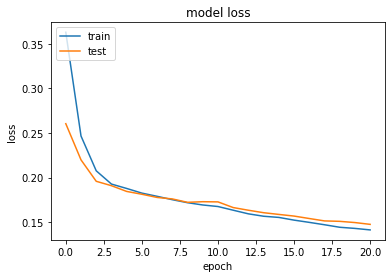

In [393]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [394]:
print("\033[1m" +str(case_name) +" of " + "data size " + str(data_size)+"\033[0m")

case14 of data size 500


In [395]:
import os

In [396]:
    #Saving the model
    
    file_path= "train_data\\" + str(case_name)+"\\" + str(data_size)+"\\ANN\\Xv.h5"
    if os.path.exists(file_path):
            os.remove(file_path)

    model1.save(file_path)

In [397]:
v_pred=model1.predict(X)
v_true =V;
np.mean(np.mean(np.abs((v_true - v_pred)/v_true)))

inf

In [398]:
v_true.shape

(500, 14)

In [399]:
v_pred.shape

(500, 14)

In [400]:

    from keras.models import Sequential # Used to build model
    from keras.layers import Dense # Type of layer
    from keras.optimizers import Adam # Optimization technique
    from keras.layers import Dropout # For tuning the neural network
    from keras import regularizers # For regularization
    mape = tf.keras.losses.MeanAbsoluteError()
    m = tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)

    #initializing neural network
    model3 = Sequential()
    model3.add(Dense(units =2*num_bus, input_dim=num_bus*4, activation='relu'))
    model3.add(Dense(units=2*num_bus ,activation='relu'))
    model3.add(Dense(units=2*num_bus ,activation='relu'))
    model3.add(Dense(units=num_bus, activation='linear'))
    
    model3.compile(loss=mape,optimizer ='adam',metrics=[m])

In [401]:
 history3=model3.fit(X,Y2,validation_data =(X,Y2),epochs=500,batch_size=32,callbacks=[callback]) 

Train on 500 samples, validate on 500 samples
Epoch 1/500
500/500 [==============================] - 1s 3ms/step - loss: 0.4734 - mean_absolute_error: 0.5266 - val_loss: 0.3444 - val_mean_absolute_error: 0.4311
Epoch 2/500
500/500 [==============================] - 0s 98us/step - loss: 0.2943 - mean_absolute_error: 0.3893 - val_loss: 0.2391 - val_mean_absolute_error: 0.3512
Epoch 3/500
500/500 [==============================] - 0s 102us/step - loss: 0.2063 - mean_absolute_error: 0.3236 - val_loss: 0.1698 - val_mean_absolute_error: 0.2979
Epoch 4/500
500/500 [==============================] - 0s 124us/step - loss: 0.1449 - mean_absolute_error: 0.2770 - val_loss: 0.1194 - val_mean_absolute_error: 0.2570
Epoch 5/500
500/500 [==============================] - 0s 96us/step - loss: 0.1100 - mean_absolute_error: 0.2404 - val_loss: 0.0980 - val_mean_absolute_error: 0.2259
Epoch 6/500
500/500 [==============================] - 0s 124us/step - loss: 0.0912 - mean_absolute_error: 0.2135 - val_los

Epoch 50/500
500/500 [==============================] - 0s 102us/step - loss: 0.0144 - mean_absolute_error: 0.0497 - val_loss: 0.0139 - val_mean_absolute_error: 0.0493
Epoch 51/500
500/500 [==============================] - 0s 96us/step - loss: 0.0141 - mean_absolute_error: 0.0489 - val_loss: 0.0140 - val_mean_absolute_error: 0.0486
Epoch 52/500
500/500 [==============================] - 0s 96us/step - loss: 0.0139 - mean_absolute_error: 0.0483 - val_loss: 0.0138 - val_mean_absolute_error: 0.0479
Epoch 53/500
500/500 [==============================] - 0s 92us/step - loss: 0.0137 - mean_absolute_error: 0.0476 - val_loss: 0.0133 - val_mean_absolute_error: 0.0473
Epoch 54/500
500/500 [==============================] - 0s 80us/step - loss: 0.0135 - mean_absolute_error: 0.0470 - val_loss: 0.0131 - val_mean_absolute_error: 0.0467
Epoch 55/500
500/500 [==============================] - 0s 74us/step - loss: 0.0135 - mean_absolute_error: 0.0463 - val_loss: 0.0129 - val_mean_absolute_error: 0.04

Epoch 99/500
500/500 [==============================] - 0s 158us/step - loss: 0.0092 - mean_absolute_error: 0.0307 - val_loss: 0.0094 - val_mean_absolute_error: 0.0306
Epoch 100/500
500/500 [==============================] - 0s 124us/step - loss: 0.0098 - mean_absolute_error: 0.0305 - val_loss: 0.0087 - val_mean_absolute_error: 0.0304
Epoch 101/500
500/500 [==============================] - 0s 124us/step - loss: 0.0091 - mean_absolute_error: 0.0303 - val_loss: 0.0090 - val_mean_absolute_error: 0.0302
Epoch 102/500
500/500 [==============================] - 0s 110us/step - loss: 0.0099 - mean_absolute_error: 0.0301 - val_loss: 0.0087 - val_mean_absolute_error: 0.0300
Epoch 103/500
500/500 [==============================] - 0s 130us/step - loss: 0.0091 - mean_absolute_error: 0.0299 - val_loss: 0.0087 - val_mean_absolute_error: 0.0298
Epoch 104/500
500/500 [==============================] - 0s 94us/step - loss: 0.0087 - mean_absolute_error: 0.0297 - val_loss: 0.0096 - val_mean_absolute_er

500/500 [==============================] - 0s 102us/step - loss: 0.0083 - mean_absolute_error: 0.0234 - val_loss: 0.0079 - val_mean_absolute_error: 0.0234
Epoch 148/500
500/500 [==============================] - 0s 94us/step - loss: 0.0088 - mean_absolute_error: 0.0233 - val_loss: 0.0076 - val_mean_absolute_error: 0.0233
Epoch 149/500
500/500 [==============================] - ETA: 0s - loss: 0.0085 - mean_absolute_error: 0.023 - 0s 142us/step - loss: 0.0090 - mean_absolute_error: 0.0232 - val_loss: 0.0073 - val_mean_absolute_error: 0.0232
Epoch 150/500
500/500 [==============================] - 0s 134us/step - loss: 0.0078 - mean_absolute_error: 0.0231 - val_loss: 0.0072 - val_mean_absolute_error: 0.0231
Epoch 151/500
500/500 [==============================] - 0s 114us/step - loss: 0.0076 - mean_absolute_error: 0.0230 - val_loss: 0.0086 - val_mean_absolute_error: 0.0230
Epoch 152/500
500/500 [==============================] - 0s 122us/step - loss: 0.0078 - mean_absolute_error: 0.0229 

500/500 [==============================] - 0s 124us/step - loss: 0.0076 - mean_absolute_error: 0.0196 - val_loss: 0.0120 - val_mean_absolute_error: 0.0196
Epoch 196/500
500/500 [==============================] - 0s 126us/step - loss: 0.0095 - mean_absolute_error: 0.0196 - val_loss: 0.0069 - val_mean_absolute_error: 0.0195
Epoch 197/500
500/500 [==============================] - 0s 114us/step - loss: 0.0093 - mean_absolute_error: 0.0195 - val_loss: 0.0107 - val_mean_absolute_error: 0.0195
Epoch 198/500
500/500 [==============================] - 0s 138us/step - loss: 0.0088 - mean_absolute_error: 0.0194 - val_loss: 0.0072 - val_mean_absolute_error: 0.0194
Epoch 199/500
500/500 [==============================] - 0s 100us/step - loss: 0.0080 - mean_absolute_error: 0.0194 - val_loss: 0.0086 - val_mean_absolute_error: 0.0194
Epoch 200/500
500/500 [==============================] - 0s 98us/step - loss: 0.0075 - mean_absolute_error: 0.0193 - val_loss: 0.0066 - val_mean_absolute_error: 0.0193
E

Epoch 244/500
500/500 [==============================] - 0s 118us/step - loss: 0.0067 - mean_absolute_error: 0.0171 - val_loss: 0.0062 - val_mean_absolute_error: 0.0171
Epoch 245/500
500/500 [==============================] - 0s 96us/step - loss: 0.0072 - mean_absolute_error: 0.0171 - val_loss: 0.0075 - val_mean_absolute_error: 0.0171
Epoch 246/500
500/500 [==============================] - 0s 104us/step - loss: 0.0069 - mean_absolute_error: 0.0171 - val_loss: 0.0097 - val_mean_absolute_error: 0.0170
Epoch 247/500
500/500 [==============================] - 0s 96us/step - loss: 0.0072 - mean_absolute_error: 0.0170 - val_loss: 0.0075 - val_mean_absolute_error: 0.0170
Epoch 248/500
500/500 [==============================] - 0s 84us/step - loss: 0.0071 - mean_absolute_error: 0.0170 - val_loss: 0.0064 - val_mean_absolute_error: 0.0170
Epoch 249/500
500/500 [==============================] - 0s 78us/step - loss: 0.0064 - mean_absolute_error: 0.0169 - val_loss: 0.0070 - val_mean_absolute_erro

Epoch 293/500
500/500 [==============================] - 0s 88us/step - loss: 0.0069 - mean_absolute_error: 0.0155 - val_loss: 0.0071 - val_mean_absolute_error: 0.0154
Epoch 294/500
500/500 [==============================] - 0s 80us/step - loss: 0.0071 - mean_absolute_error: 0.0154 - val_loss: 0.0086 - val_mean_absolute_error: 0.0154
Epoch 295/500
500/500 [==============================] - 0s 72us/step - loss: 0.0084 - mean_absolute_error: 0.0154 - val_loss: 0.0092 - val_mean_absolute_error: 0.0154
Epoch 296/500
500/500 [==============================] - 0s 78us/step - loss: 0.0068 - mean_absolute_error: 0.0154 - val_loss: 0.0063 - val_mean_absolute_error: 0.0154
Epoch 297/500
500/500 [==============================] - 0s 78us/step - loss: 0.0070 - mean_absolute_error: 0.0153 - val_loss: 0.0060 - val_mean_absolute_error: 0.0153
Epoch 298/500
500/500 [==============================] - 0s 76us/step - loss: 0.0067 - mean_absolute_error: 0.0153 - val_loss: 0.0062 - val_mean_absolute_error:

Epoch 342/500
500/500 [==============================] - 0s 116us/step - loss: 0.0070 - mean_absolute_error: 0.0142 - val_loss: 0.0062 - val_mean_absolute_error: 0.0142
Epoch 343/500
500/500 [==============================] - 0s 102us/step - loss: 0.0063 - mean_absolute_error: 0.0142 - val_loss: 0.0062 - val_mean_absolute_error: 0.0142
Epoch 344/500
500/500 [==============================] - 0s 102us/step - loss: 0.0063 - mean_absolute_error: 0.0142 - val_loss: 0.0083 - val_mean_absolute_error: 0.0141
Epoch 345/500
500/500 [==============================] - 0s 94us/step - loss: 0.0068 - mean_absolute_error: 0.0141 - val_loss: 0.0059 - val_mean_absolute_error: 0.0141
Epoch 346/500
500/500 [==============================] - 0s 90us/step - loss: 0.0069 - mean_absolute_error: 0.0141 - val_loss: 0.0073 - val_mean_absolute_error: 0.0141
Epoch 347/500
500/500 [==============================] - 0s 106us/step - loss: 0.0062 - mean_absolute_error: 0.0141 - val_loss: 0.0069 - val_mean_absolute_er

Epoch 391/500
500/500 [==============================] - 0s 78us/step - loss: 0.0066 - mean_absolute_error: 0.0133 - val_loss: 0.0065 - val_mean_absolute_error: 0.0133
Epoch 392/500
500/500 [==============================] - 0s 82us/step - loss: 0.0060 - mean_absolute_error: 0.0132 - val_loss: 0.0059 - val_mean_absolute_error: 0.0132
Epoch 393/500
500/500 [==============================] - 0s 78us/step - loss: 0.0062 - mean_absolute_error: 0.0132 - val_loss: 0.0061 - val_mean_absolute_error: 0.0132
Epoch 394/500
500/500 [==============================] - 0s 72us/step - loss: 0.0063 - mean_absolute_error: 0.0132 - val_loss: 0.0063 - val_mean_absolute_error: 0.0132
Epoch 395/500
500/500 [==============================] - 0s 80us/step - loss: 0.0068 - mean_absolute_error: 0.0132 - val_loss: 0.0074 - val_mean_absolute_error: 0.0132
Epoch 396/500
500/500 [==============================] - 0s 82us/step - loss: 0.0071 - mean_absolute_error: 0.0132 - val_loss: 0.0068 - val_mean_absolute_error:

Epoch 440/500
500/500 [==============================] - 0s 74us/step - loss: 0.0058 - mean_absolute_error: 0.0125 - val_loss: 0.0057 - val_mean_absolute_error: 0.0125
Epoch 441/500
500/500 [==============================] - 0s 70us/step - loss: 0.0064 - mean_absolute_error: 0.0125 - val_loss: 0.0059 - val_mean_absolute_error: 0.0125
Epoch 442/500
500/500 [==============================] - 0s 76us/step - loss: 0.0059 - mean_absolute_error: 0.0125 - val_loss: 0.0057 - val_mean_absolute_error: 0.0125
Epoch 443/500
500/500 [==============================] - 0s 78us/step - loss: 0.0068 - mean_absolute_error: 0.0125 - val_loss: 0.0055 - val_mean_absolute_error: 0.0125
Epoch 444/500
500/500 [==============================] - 0s 70us/step - loss: 0.0061 - mean_absolute_error: 0.0125 - val_loss: 0.0080 - val_mean_absolute_error: 0.0124
Epoch 445/500
500/500 [==============================] - 0s 76us/step - loss: 0.0079 - mean_absolute_error: 0.0124 - val_loss: 0.0059 - val_mean_absolute_error:

Epoch 489/500
500/500 [==============================] - 0s 76us/step - loss: 0.0055 - mean_absolute_error: 0.0119 - val_loss: 0.0055 - val_mean_absolute_error: 0.0119
Epoch 490/500
500/500 [==============================] - 0s 86us/step - loss: 0.0057 - mean_absolute_error: 0.0119 - val_loss: 0.0057 - val_mean_absolute_error: 0.0119
Epoch 491/500
500/500 [==============================] - 0s 80us/step - loss: 0.0065 - mean_absolute_error: 0.0119 - val_loss: 0.0070 - val_mean_absolute_error: 0.0118
Epoch 492/500
500/500 [==============================] - 0s 80us/step - loss: 0.0058 - mean_absolute_error: 0.0118 - val_loss: 0.0058 - val_mean_absolute_error: 0.0118
Epoch 493/500
500/500 [==============================] - 0s 78us/step - loss: 0.0057 - mean_absolute_error: 0.0118 - val_loss: 0.0059 - val_mean_absolute_error: 0.0118
Epoch 494/500
500/500 [==============================] - 0s 86us/step - loss: 0.0058 - mean_absolute_error: 0.0118 - val_loss: 0.0055 - val_mean_absolute_error:

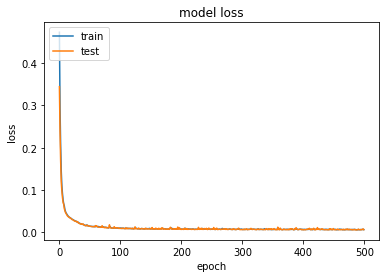

In [402]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [403]:
    #Saving the model
    
    file_path= "train_data\\" + str(case_name)+"\\" + str(data_size)+"\\ANN\\Xva.h5"
    if os.path.exists(file_path):
            os.remove(file_path)

    model3.save(file_path)

In [404]:
    model4 = Sequential()
    model4.add(Dense(units =2*num_bus, input_dim=num_bus*4, activation='relu'))
    model4.add(Dense(units=2*num_bus ,activation='relu'))
    model4.add(Dense(units=2*num_bus ,activation='relu'))
    model4.add(Dense(units=num_bus, activation='linear'))
    
    model4.compile(loss=mape,optimizer ='adam',metrics=[m])

In [405]:
#Train_test splitting
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y2, test_size=0.2, random_state=42)
history4=model4.fit(X_train2,y_train2,validation_data =(X_test2,y_test2),epochs=500,batch_size=32,callbacks=[callback])

Train on 400 samples, validate on 100 samples
Epoch 1/500
400/400 [==============================] - 0s 897us/step - loss: 0.5411 - mean_absolute_error: 0.0120 - val_loss: 0.4556 - val_mean_absolute_error: 0.0122
Epoch 2/500
400/400 [==============================] - 0s 92us/step - loss: 0.3901 - mean_absolute_error: 0.0124 - val_loss: 0.3196 - val_mean_absolute_error: 0.0126
Epoch 3/500
400/400 [==============================] - 0s 98us/step - loss: 0.2777 - mean_absolute_error: 0.0127 - val_loss: 0.2204 - val_mean_absolute_error: 0.0129
Epoch 4/500
400/400 [==============================] - 0s 105us/step - loss: 0.1799 - mean_absolute_error: 0.0129 - val_loss: 0.1364 - val_mean_absolute_error: 0.0130
Epoch 5/500
400/400 [==============================] - 0s 118us/step - loss: 0.1199 - mean_absolute_error: 0.0131 - val_loss: 0.1099 - val_mean_absolute_error: 0.0131
Epoch 6/500
400/400 [==============================] - 0s 112us/step - loss: 0.1019 - mean_absolute_error: 0.0132 - val_l

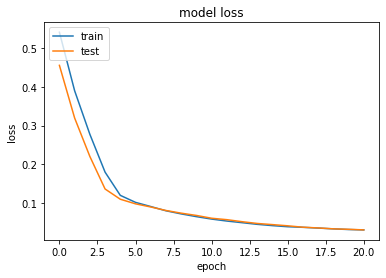

In [406]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [407]:
file_path1= "train_data\\" + str(case_name)+"\\" + str(data_size)+"\\ANN\\Xv.h5"

In [408]:
Xv=load_model(file_path1)

In [409]:
V_pred=Xv.predict(X)

In [410]:
V_pred.shape

(500, 14)

In [411]:
file_path2= "train_data\\" + str(case_name)+"\\" + str(data_size)+"\\ANN\\Xva.h5"

In [412]:
Xva=load_model(file_path2)

In [413]:
Va_pred=Xva.predict(X)

In [414]:
Va_pred.shape

(500, 14)

In [415]:
address_params = 'train_data/' + case_name+'/'+str(data_size)+'/ANN/result/'

In [416]:
V_pred=pd.DataFrame(V_pred)
Va_pred=pd.DataFrame(Va_pred)
V=pd.DataFrame(V)
Va=pd.DataFrame(Va)


In [417]:
V_pred.to_csv(address_params+'/V_pred.csv', header = None,index =False)
Va_pred.to_csv(address_params+'/Va_pred.csv', header = None,index=False)
V.to_csv(address_params+'/V.csv', header = None,index =False)
Va.to_csv(address_params+'/Va.csv', header = None,index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'train_data/case14/500/ANN/result//V_pred.csv'

In [ ]:
Va_pred